# Project: Missing Value Imputation Methods (I)
by Aya Tamura, 21 July 2024

This project aims to impute missing values in sample datasets. The datasets were created by the author to practice a range of imputation methods.

## Dataset
The dataset contains student data, including `studentID`, `grade`, and scores for subjects (Math, Science, and English).

## Objectives
1. **Identify Missing Values**: Analyze the dataset to identify any missing values.

2. **Identify the Type of Missing Values**: Conduct exploratory data analysis to examine if the missingness depends on other variables. 
   The types of missing values are: Missing Completely At Random (MCAR), Missing At Random (MAR), and Missing Not At Random (MNAR).

3. **Apply Appropriate Imputation Methods**: Use various techniques such as mean, median, and mode imputation, as well as more advanced methods like K-Nearest Neighbors (KNN) imputation or machine learning models.

4. **Discuss the Best Imputation Method**: Explain why the chosen imputation method is the most appropriate for the dataset.

In [510]:
!pip install missingno
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer


In [511]:
# Create a sample dataset for practice
student_data = {
    'StudentID': list(range(1, 51)),
    'Grade': [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 
              5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 
              3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
              1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 
              5, 6, 1, 2, 3, 4, 5, 6, 1, 2],
    'Math': [85, np.nan, 78, 92, np.nan, 88, 76, 90, np.nan, 84,
             81, np.nan, 75, 89, 93, 88, 77, np.nan, 85, 80,
             np.nan, 91, 82, np.nan, 78, 85, 79, 84, 86, np.nan,
             90, 87, np.nan, 85, 91, 83, np.nan, 89, 84, 81,
             88, np.nan, 82, 79, 77, 85, np.nan, 80, 89, 92],
    'Science': [88, 76, np.nan, 89, 95, 78, np.nan, 91, 87, 90,
                85, np.nan, 82, 79, 84, np.nan, 77, 86, 80, 88,
                91, np.nan, 83, 85, np.nan, 78, 88, 90, 86, 84,
                89, 91, 87, np.nan, 84, 78, 86, 85, 80, 77,
                np.nan, 88, 82, 90, 85, 84, 89, 91, 86, 80],
    'English': [np.nan, 81, 79, np.nan, 86, 88, 77, 85, 80, 84,
                90, 83, np.nan, 78, 82, 79, 88, 91, np.nan, 86,
                84, 89, np.nan, 87, 78, np.nan, 85, 80, 88, 87,
                np.nan, 82, 84, 89, 80, 88, 86, 85, 83, 81,
                79, 88, np.nan, 85, 80, 83, 88, 90, 84, 86]
}
df = pd.DataFrame(student_data)
df.shape

(50, 5)

The dataset is ready. Let’s check if there are any missing values.

# 1. Identify Missing Values in the Dataset

In [512]:
# Show the first ten rows of the data
print(df.head(10))
print(df.info())

   StudentID  Grade  Math  Science  English
0          1      1  85.0     88.0      NaN
1          2      2   NaN     76.0     81.0
2          3      3  78.0      NaN     79.0
3          4      4  92.0     89.0      NaN
4          5      5   NaN     95.0     86.0
5          6      6  88.0     78.0     88.0
6          7      1  76.0      NaN     77.0
7          8      2  90.0     91.0     85.0
8          9      3   NaN     87.0     80.0
9         10      4  84.0     90.0     84.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StudentID  50 non-null     int64  
 1   Grade      50 non-null     int64  
 2   Math       38 non-null     float64
 3   Science    42 non-null     float64
 4   English    42 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 2.1 KB
None


In [513]:
# Get percentage of missing values
missing_percentages = df.isnull().mean().sort_values(ascending=False)
missing_percentages

Math         0.24
Science      0.16
English      0.16
StudentID    0.00
Grade        0.00
dtype: float64

Based on the quick data review, we know that there are some missing values in the subject score variables, but not in other variables.

The percentage of missing values in Math, Science, and English are 24%, 16%, and 16%, respectively. Let's dig in deeper to determine if the missingness in subject scores depends on other variables.

Does the missingness depend on 'Grade' (e.g., lower grade, more missing values)?

# 2. Identify the Type of Missing Values

    StudentID  Grade  Math  Science  English
0           1      1  85.0     88.0      NaN
42         43      1  82.0     82.0      NaN
36         37      1   NaN     86.0     86.0
30         31      1  90.0     89.0      NaN
48         49      1  89.0     86.0     84.0
18         19      1  85.0     80.0      NaN
12         13      1  75.0     82.0      NaN
24         25      1  78.0      NaN     78.0
6           7      1  76.0      NaN     77.0
49         50      2  92.0     80.0     86.0
43         44      2  79.0     90.0     85.0
1           2      2   NaN     76.0     81.0
13         14      2  89.0     79.0     78.0
37         38      2  89.0     85.0     85.0
31         32      2  87.0     91.0     82.0
19         20      2  80.0     88.0     86.0
7           8      2  90.0     91.0     85.0
25         26      2  85.0     78.0      NaN
44         45      3  77.0     85.0     80.0
38         39      3  84.0     80.0     83.0
2           3      3  78.0      NaN     79.0
32        

<Axes: >

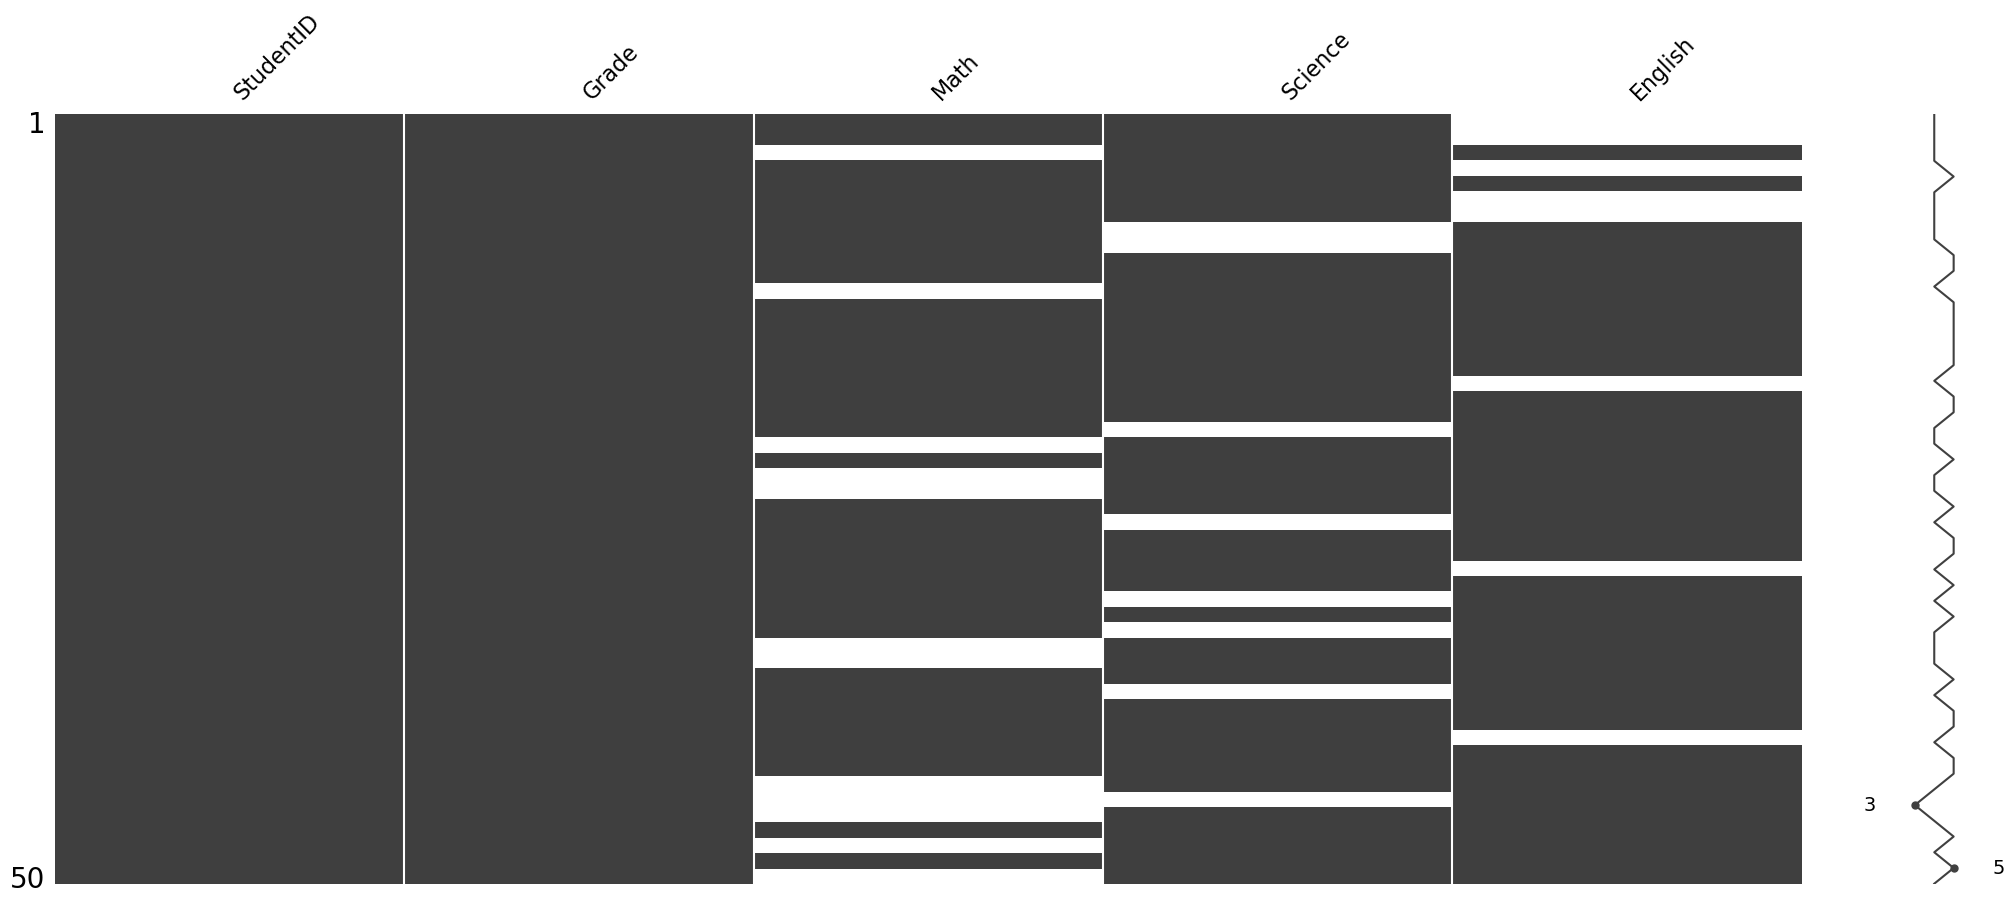

In [514]:
# Sort data by `Grade`
df_sorted_by_grade = df.sort_values(by='Grade')
print(df_sorted_by_grade)

# Visualise the missing values to see the relationship with other variables
msno.matrix(df_sorted_by_grade)

In [515]:
# Calculate missing values per grade and per subject
missing_by_grade = df.groupby('Grade').apply(lambda x: x.isnull().sum())
# Rename the index to avoid conflict 
missing_by_grade_reset = missing_by_grade.rename_axis('grade').reset_index()
# Drop unnecessesary caeiables
missing_by_grade_reset = missing_by_grade_reset.drop(columns=['StudentID', 'Grade'])
missing_by_grade_reset

,grade,Math,Science,English
0,1,1,2,5
1,2,1,0,1
2,3,3,1,0
3,4,0,3,1
4,5,2,1,1
5,6,5,1,0


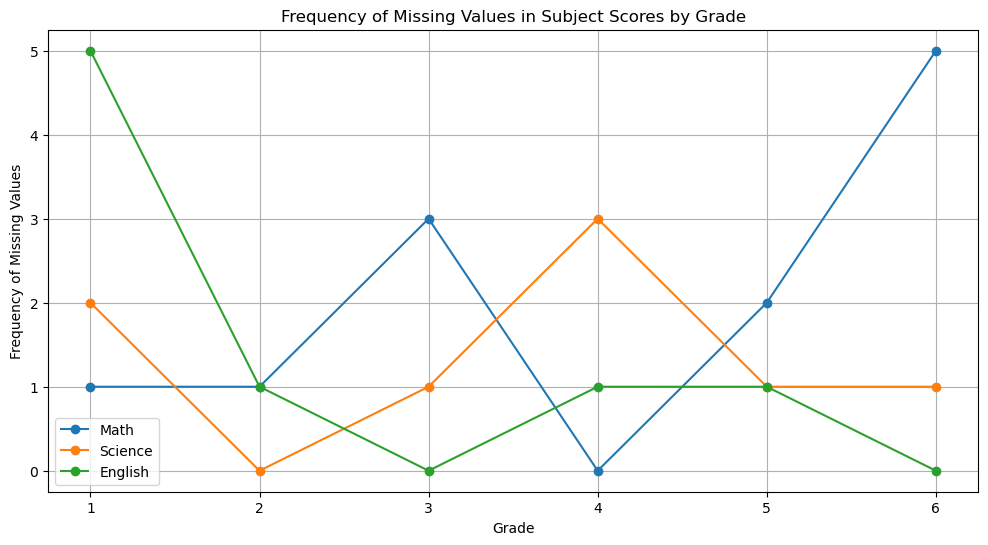

In [516]:
# Plot the line graph to see the correlation
plt.figure(figsize=(12, 6))

subjects = missing_by_grade_reset.columns[1:]  # Get subject names excluding 'Grade'
for subject in subjects:
    plt.plot(missing_by_grade_reset['grade'], missing_by_grade_reset[subject], marker='o', linestyle='-', label=subject)

plt.title('Frequency of Missing Values in Subject Scores by Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency of Missing Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability if needed
plt.show()


Based on the exploratory analysis above, we can assume that missing values in subject scores are completely at random.

Since the values are numerical data, we can consider mean or median imputation. However, it is important to examine if there are any outliers in the data.

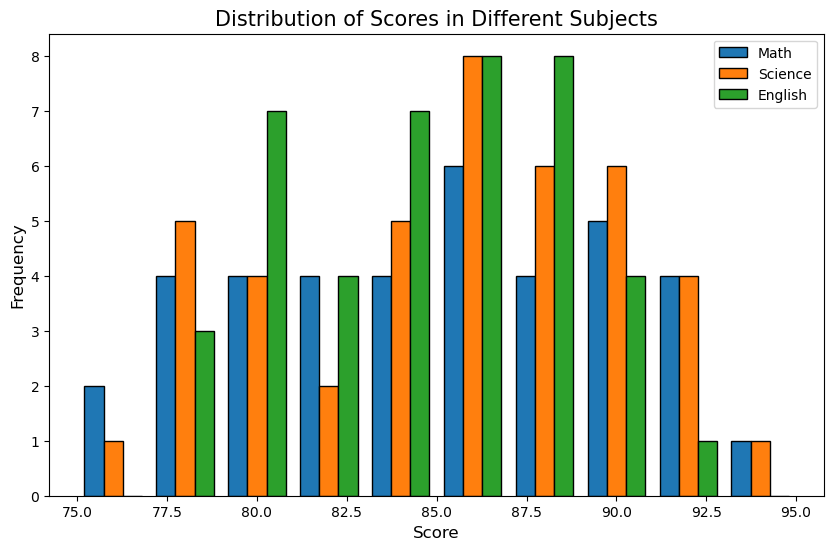

In [517]:
# Plot a histogram
# Define the subjects for which we want to plot the histogram
subjects = ['Math', 'Science', 'English']
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df[subjects], label=subjects, bins=10, edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Scores in Different Subjects', fontsize=15)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adding legend
plt.legend(loc='upper right')

# Display the plot
plt.show()

From the above information, we can assume that there are no extreme scores and we can use mean imputation for this case.

# 3. Apply an appropriate imputation method

Method: Mean Imputation

Let's use the mean by grade to replace the missing values because it provides more precise values compared to the overall mean of all grades.

In [518]:
# Function to fill missing values with mean by grade
def fillna_by_grade_mean(df, subject):
    return df[subject].fillna(df.groupby('Grade')[subject].transform('mean'))

# Apply the function to each subject
df['Math_imputed'] = fillna_by_grade_mean(df, 'Math')
df['Science_imputed'] = fillna_by_grade_mean(df, 'Science')
df['English_imputed'] = fillna_by_grade_mean(df, 'English')

# Display the head of the DataFrame to check the imputation
df.sort_values(by='Grade').head(15)


,StudentID,Grade,Math,Science,English,Math_imputed,Science_imputed,English_imputed
0,1,1,85.0,88.0,NaN,85.000,88.000000,81.25
42,43,1,82.0,82.0,NaN,82.000,82.000000,81.25
36,37,1,NaN,86.0,86.0,82.500,86.000000,86.00
30,31,1,90.0,89.0,NaN,90.000,89.000000,81.25
48,49,1,89.0,86.0,84.0,89.000,86.000000,84.00
18,19,1,85.0,80.0,NaN,85.000,80.000000,81.25
12,13,1,75.0,82.0,NaN,75.000,82.000000,81.25
24,25,1,78.0,NaN,78.0,78.000,84.714286,78.00
6,7,1,76.0,NaN,77.0,76.000,84.714286,77.00
49,50,2,92.0,80.0,86.0,92.000,80.000000,86.00


# 4. Discuss why the imputation would be the best method.

Based on our exploratory data analysis, we determined that the missing values in the subject scores (Math, Science, and English) are missing completely at random (MCAR). This means that the likelihood of a value being missing is unrelated to any other observed data, making imputation a straightforward process.

Given that the data is numeric and does not contain outliers, mean imputation is an appropriate method. Mean imputation is a simple yet effective technique where missing values are replaced with the mean of the available data. This method is beneficial in maintaining the overall statistical properties of the dataset, such as the mean and variance, which is crucial for subsequent analyses.

Moreover, using the mean by grade to replace missing values ensures that we account for variations in performance across different grade levels. This approach provides a more precise and contextually relevant imputation compared to using a single mean for all grades, thereby preserving the integrity of the dataset and improving the accuracy of any models built using this data.

In summary, mean imputation by grade is the best method for this dataset because it:

Maintains the statistical properties of the dataset.
Accounts for variations across different grades.
Is simple and effective for handling numeric data without outliers.
Ensures the dataset remains robust for further analysis and modeling.

# END